In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
nypd_data = pd.read_csv("/nypd_data.csv")

In [59]:
nypd_data.head(5)


,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,01/01/2023,12/31/2022,23:24:39,67,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,01/01/2023,12/31/2022,23:24:47,75,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221
2,91250681,01/01/2023,12/31/2022,23:55:56,114,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:26 AM,01/01/2023 12:06:18 AM,NaN,01/01/2023 12:06:27 AM,40.762587,-73.912199
3,91250683,01/01/2023,12/31/2022,23:55:59,66,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:34 AM,01/01/2023 12:37:14 AM,01/01/2023 01:09:32 AM,01/01/2023 01:21:14 AM,40.610729,-73.967644
4,91250700,01/01/2023,12/31/2022,23:57:08,115,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:01:29 AM,01/01/2023 12:14:28 AM,01/01/2023 12:21:59 AM,01/01/2023 01:24:22 AM,40.748119,-73.891679


In [60]:
nypd_data.dtypes

CAD_EVNT_ID        int64
CREATE_DATE       object
INCIDENT_DATE     object
INCIDENT_TIME     object
NYPD_PCT_CD        int64
BORO_NM           object
PATRL_BORO_NM     object
GEO_CD_X           int64
GEO_CD_Y           int64
RADIO_CODE        object
TYP_DESC          object
CIP_JOBS          object
ADD_TS            object
DISP_TS           object
ARRIVD_TS         object
CLOSNG_TS         object
Latitude         float64
Longitude        float64
dtype: object

In [61]:
nypd_data.shape


(119286, 18)

In [62]:
nypd_data.describe()

,CAD_EVNT_ID,NYPD_PCT_CD,GEO_CD_X,GEO_CD_Y,Latitude,Longitude
count,1.192860e+05,119286.00000,1.192860e+05,119286.000000,119285.000000,119285.000000
mean,9.132275e+07,60.52416,1.003154e+06,206963.913251,40.734710,-73.931762
std,4.129491e+04,34.87836,2.029975e+04,29595.047017,0.081234,0.073213
min,9.125018e+07,0.00000,9.136260e+05,121441.000000,40.499759,-74.253951
25%,9.128708e+07,32.00000,9.894200e+05,185227.000000,40.675054,-73.981391
50%,9.132295e+07,61.00000,1.001300e+06,206596.000000,40.733743,-73.938466
75%,9.135841e+07,88.00000,1.014462e+06,233260.000000,40.806898,-73.890967
max,9.139399e+07,123.00000,1.067185e+06,271820.000000,40.912723,-73.700720


In [63]:
nypd_data.columns

Index(['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME',
       'NYPD_PCT_CD', 'BORO_NM', 'PATRL_BORO_NM', 'GEO_CD_X', 'GEO_CD_Y',
       'RADIO_CODE', 'TYP_DESC', 'CIP_JOBS', 'ADD_TS', 'DISP_TS', 'ARRIVD_TS',
       'CLOSNG_TS', 'Latitude', 'Longitude'],
      dtype='object')

In [64]:
nypd_data.isnull().sum()

CAD_EVNT_ID          0
CREATE_DATE          0
INCIDENT_DATE        0
INCIDENT_TIME        0
NYPD_PCT_CD          0
BORO_NM              0
PATRL_BORO_NM        0
GEO_CD_X             0
GEO_CD_Y             0
RADIO_CODE           0
TYP_DESC             0
CIP_JOBS             0
ADD_TS               0
DISP_TS              0
ARRIVD_TS        23275
CLOSNG_TS            0
Latitude             1
Longitude            1
dtype: int64

In [80]:
columns_to_impute = ['ARRIVD_TS', 'Latitude', 'Longitude']

for column in columns_to_impute:
    mode_value = nypd_data[column].mode()[0]  # Calculate mode value for the column
    nypd_data[column].fillna(mode_value, inplace=True)  # Replace missing values with mode




In [82]:
nypd_data.isnull().sum()

CAD_EVNT_ID      0
CREATE_DATE      0
INCIDENT_DATE    0
INCIDENT_TIME    0
NYPD_PCT_CD      0
BORO_NM          0
PATRL_BORO_NM    0
GEO_CD_X         0
GEO_CD_Y         0
RADIO_CODE       0
TYP_DESC         0
CIP_JOBS         0
ADD_TS           0
DISP_TS          0
ARRIVD_TS        0
CLOSNG_TS        0
Latitude         0
Longitude        0
dtype: int64

In [83]:
nypd_data.shape


(119286, 18)

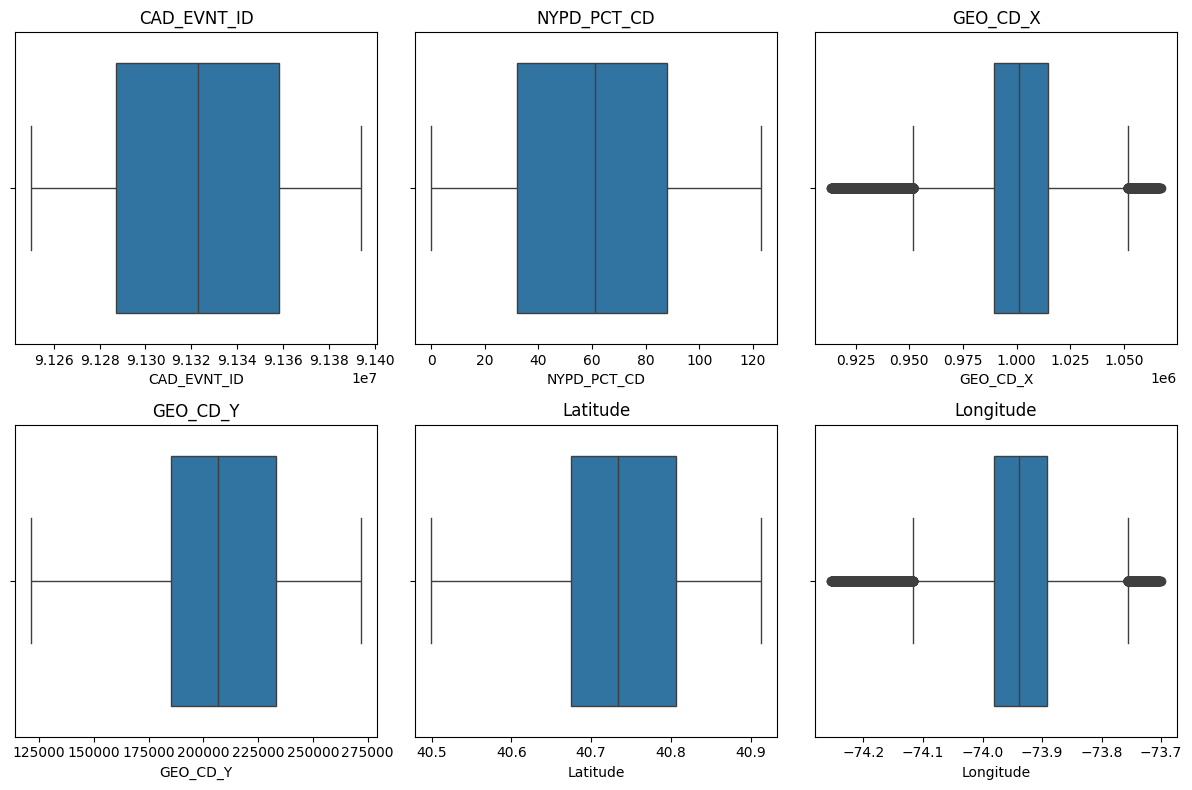

In [84]:
numeric_columns = nypd_data.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=nypd_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [85]:
from scipy.stats import mstats

lower_percentile = 1
upper_percentile = 99

nypd_data['GEO_CD_X_winsorized'] = mstats.winsorize(nypd_data['GEO_CD_X'], limits=(lower_percentile/100, upper_percentile/100))

nypd_data['Longitude_winsorized'] = mstats.winsorize(nypd_data['Longitude'], limits=(lower_percentile/100, upper_percentile/100))

print(nypd_data[['GEO_CD_X_winsorized', 'Longitude_winsorized']].describe())


       GEO_CD_X_winsorized  Longitude_winsorized
count             119286.0          119286.00000
mean              939092.0             -74.16269
std                    0.0               0.00000
min               939092.0             -74.16269
25%               939092.0             -74.16269
50%               939092.0             -74.16269
75%               939092.0             -74.16269
max               939092.0             -74.16269


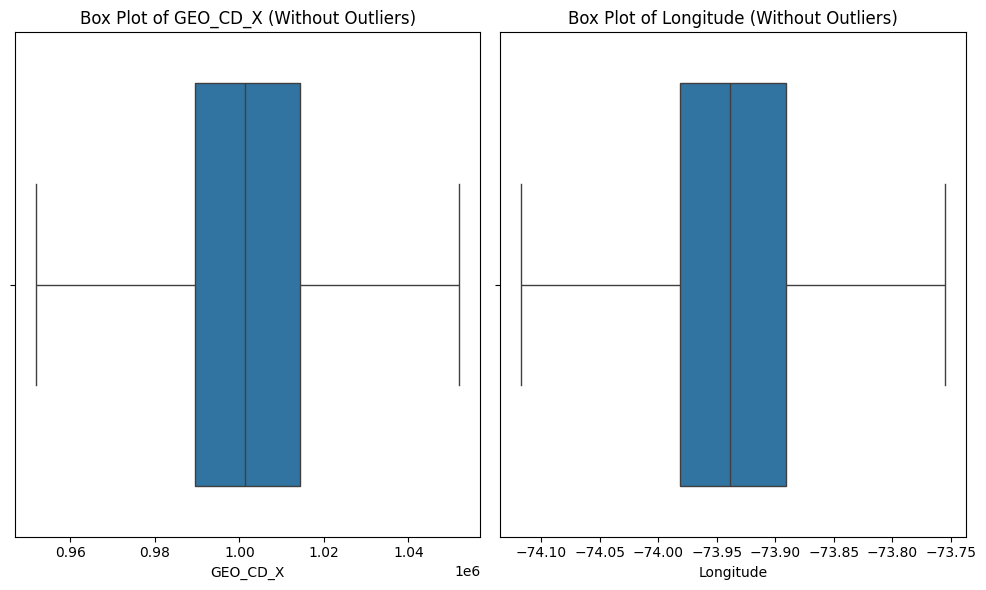

In [94]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=nypd_data['GEO_CD_X'], showfliers=False)
plt.title('Box Plot of GEO_CD_X (Without Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=nypd_data['Longitude'], showfliers=False)
plt.title('Box Plot of Longitude (Without Outliers)')

plt.tight_layout()
plt.show()


In [99]:

categorical_columns = ['BORO_NM', 'PATRL_BORO_NM', 'RADIO_CODE', 'TYP_DESC', 'CIP_JOBS']

nypd_data = pd.get_dummies(nypd_data, columns=categorical_columns)


In [101]:
nypd_data['CREATE_DATE'] = pd.to_datetime(nypd_data['CREATE_DATE'])
nypd_data['INCIDENT_DATE'] = pd.to_datetime(nypd_data['INCIDENT_DATE'])
nypd_data['INCIDENT_TIME'] = pd.to_datetime(nypd_data['INCIDENT_TIME'])
nypd_data['ADD_TS'] = pd.to_datetime(nypd_data['ADD_TS'])
nypd_data['DISP_TS'] = pd.to_datetime(nypd_data['DISP_TS'])
nypd_data['ARRIVD_TS'] = pd.to_datetime(nypd_data['ARRIVD_TS'])
nypd_data['CLOSNG_TS'] = pd.to_datetime(nypd_data['CLOSNG_TS'])


In [107]:
nypd_data.columns

Index(['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME',
       'NYPD_PCT_CD', 'GEO_CD_X', 'GEO_CD_Y', 'ADD_TS', 'DISP_TS', 'ARRIVD_TS',
       ...
       'TYP_DESC_VISIBILITY PATROL: FAMILY/HOME VISIT',
       'TYP_DESC_VISIBILITY PATROL: INTERIOR',
       'TYP_DESC_VISIBILITY PATROL: LICENSED PREMISE',
       'TYP_DESC_VISIBILITY PATROL: WARRANT CHECK',
       'TYP_DESC_VISIBILITY PATROL:PUBLIC/PRIVATE EDUCATIONAL FACILITY',
       'TYP_DESC_YOUTH HOME VISIT', 'CIP_JOBS_Critical', 'CIP_JOBS_Non CIP',
       'CIP_JOBS_Non Critical', 'CIP_JOBS_Serious'],
      dtype='object', length=741)